## First project for DESI collaboration.
In this small project we analyze data from DR9d file. (Version 2)

In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import fitsio
#import desitarget.mtl
from astropy.io import fits
from astropy.table import Table, Column, vstack
import json
import shutil
import healpy


#from desitarget.targetmask import desi_mask, bgs_mask, mws_mask, obsconditions
from collections import Counter
import subprocess

%matplotlib inline

In [2]:
#locate filename in DESI collaboration at NERSC.
#target_filename = "/project/projectdirs/desi/target/catalogs/dr9d/PRnone/targets/main/resolve/bright/targets-dr9-hp-X.fits"
targets_filename = "targets-dr9-hp-X.fits"
targets = Table.read(targets_filename)

In [3]:
targets[0:5]
print(len(targets))

2435606


In [4]:
# Eliminating WISE and ZERO objects..!
targets=targets[targets["BGS_TARGET"]!=0]
targets=targets[targets["BGS_TARGET"]!=262148]
targets=targets[targets["BGS_TARGET"]!=1028]
len(targets)

976129

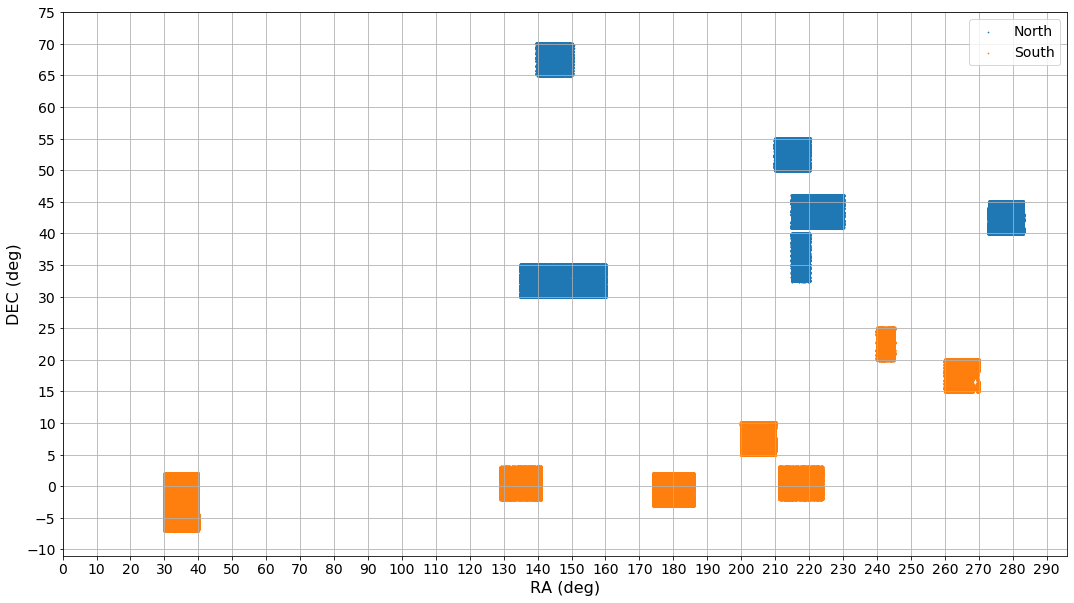

In [5]:
plt.figure(figsize=(18,10))
targets_north=targets[targets['DEC']>29]
targets_south=targets[targets['DEC']<29]
plt.scatter(targets_north['RA'], targets_north['DEC'], s=0.5, label="North")
plt.scatter(targets_south['RA'], targets_south['DEC'], s=0.5, label="South")
plt.xlabel("RA (deg)",fontsize=16)
plt.ylabel("DEC (deg)",fontsize=16)
plt.legend(fontsize=14)
plt.xticks(np.arange(0,300,10),fontsize=14)
plt.yticks(np.arange(-10,80,5),fontsize=14)
plt.grid()
plt.show()

In [6]:
#Defining zones
#SOUTH zones
s1=targets[(targets["RA"]>15)&(targets["RA"]<45)&(targets["DEC"]>-10)&(targets["DEC"]<5)]
s2=targets[(targets["RA"]>125)&(targets["RA"]<145)&(targets["DEC"]>-5)&(targets["DEC"]<5)]
s3=targets[(targets["RA"]>170)&(targets["RA"]<190)&(targets["DEC"]>-5)&(targets["DEC"]<5)]
s4=targets[(targets["RA"]>210)&(targets["RA"]<230)&(targets["DEC"]>-5)&(targets["DEC"]<4)]
s5=targets[(targets["RA"]>195)&(targets["RA"]<215)&(targets["DEC"]>4)&(targets["DEC"]<12)]
s6=targets[(targets["RA"]>255)&(targets["RA"]<275)&(targets["DEC"]>13)&(targets["DEC"]<23)]
s7=targets[(targets["RA"]>235)&(targets["RA"]<250)&(targets["DEC"]>17)&(targets["DEC"]<27)]
#NORTH zones
n1=targets[(targets["RA"]>130)&(targets["RA"]<165)&(targets["DEC"]>27)&(targets["DEC"]<37)]
n2=targets[(targets["RA"]>210)&(targets["RA"]<225)&(targets["DEC"]>30)&(targets["DEC"]<40.5)]
n3=targets[(targets["RA"]>210)&(targets["RA"]<235)&(targets["DEC"]>40.5)&(targets["DEC"]<48)]
n4=targets[(targets["RA"]>270)&(targets["RA"]<290)&(targets["DEC"]>35)&(targets["DEC"]<50)]
n5=targets[(targets["RA"]>205)&(targets["RA"]<225)&(targets["DEC"]>47)&(targets["DEC"]<60)]
n6=targets[(targets["RA"]>135)&(targets["RA"]<155)&(targets["DEC"]>60)&(targets["DEC"]<80)]

In [7]:
#Verifing that zones are corrects and represent all data
print("Total objects count =",len(targets))
print("===========================================================")
print("Total objects counts for s1 =",len(s1))
print("Total objects counts for s2 =",len(s2))
print("Total objects counts for s3 =",len(s3))
print("Total objects counts for s4 =",len(s4))
print("Total objects counts for s5 =",len(s5))
print("Total objects counts for s6 =",len(s6))
print("Total objects counts for s7 =",len(s7))
print("===========================================================")
print("Total objects count in SOUTH zones=",len(s1)+len(s2)+len(s3)+len(s4)+len(s5)+len(s6)+len(s7))
print("===========================================================")
print("Total objects counts for n1 =",len(n1))
print("Total objects counts for n2 =",len(n2))
print("Total objects counts for n3 =",len(n3))
print("Total objects counts for n4 =",len(n4))
print("Total objects counts for n5 =",len(n5))
print("Total objects counts for n6 =",len(n6))
print("===========================================================")
print("Total objects count in NORTH zones=",len(n1)+len(n2)+len(n3)+len(n4)+len(n5)+len(n6))
print("===========================================================")
print("Total objects count in SOUTH and NORTH zones=",len(s1)+len(s2)+len(s3)+len(s4)+len(s5)+len(s6)+
      len(s7)+len(n1)+len(n2)+len(n3)+len(n4)+len(n5)+len(n6))
print("===========================================================")

Total objects count = 976129
Total objects counts for s1 = 137885
Total objects counts for s2 = 89560
Total objects counts for s3 = 92850
Total objects counts for s4 = 97099
Total objects counts for s5 = 73839
Total objects counts for s6 = 62221
Total objects counts for s7 = 34753
Total objects count in SOUTH zones= 588207
Total objects counts for n1 = 150431
Total objects counts for n2 = 42781
Total objects counts for n3 = 78971
Total objects counts for n4 = 48281
Total objects counts for n5 = 42011
Total objects counts for n6 = 25447
Total objects count in NORTH zones= 387922
Total objects count in SOUTH and NORTH zones= 976129


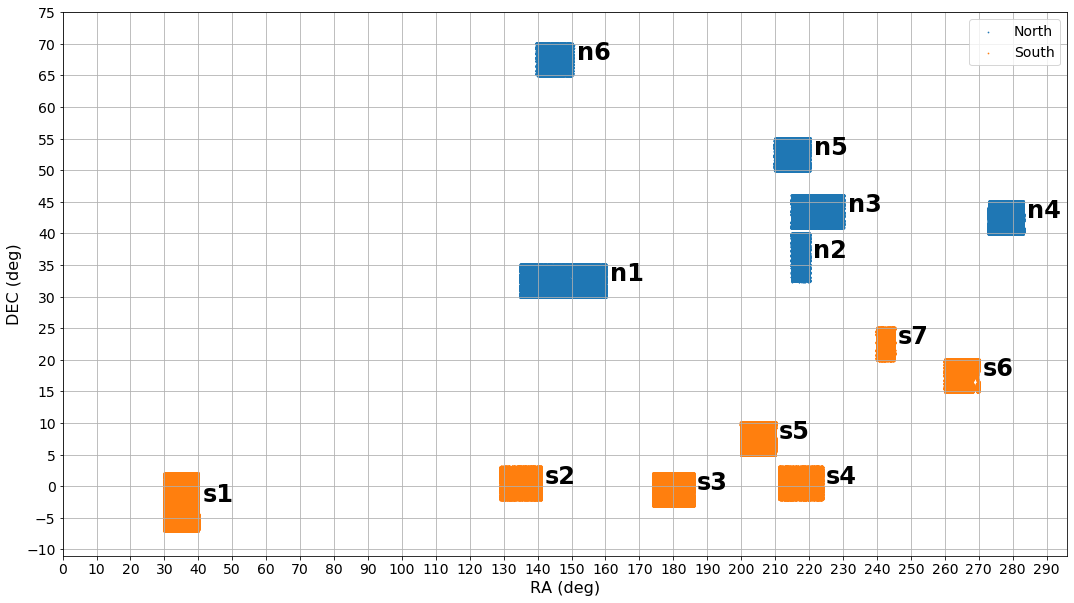

In [8]:
plt.figure(figsize=(18,10))
targets_north=targets[targets['DEC']>29]
targets_south=targets[targets['DEC']<29]
plt.scatter(targets_north['RA'], targets_north['DEC'], s=0.5, label="North")
plt.scatter(targets_south['RA'], targets_south['DEC'], s=0.5, label="South")
plt.xlabel("RA (deg)",fontsize=16)
plt.ylabel("DEC (deg)",fontsize=16)
plt.legend(fontsize=14)
plt.xticks(np.arange(0,300,10),fontsize=14)
plt.yticks(np.arange(-10,80,5),fontsize=14)
plt.text((s1["RA"].max())+1,(s1["DEC"].max()+s1["DEC"].min())/2,"s1",fontsize=24,fontweight='bold')
plt.text((s2["RA"].max())+1,(s2["DEC"].max()+s2["DEC"].min())/2,"s2",fontsize=24,fontweight='bold')
plt.text((s3["RA"].max())+1,(s3["DEC"].max()+s3["DEC"].min())/2,"s3",fontsize=24,fontweight='bold')
plt.text((s4["RA"].max())+1,(s4["DEC"].max()+s4["DEC"].min())/2,"s4",fontsize=24,fontweight='bold')
plt.text((s5["RA"].max())+1,(s5["DEC"].max()+s5["DEC"].min())/2,"s5",fontsize=24,fontweight='bold')
plt.text((s6["RA"].max())+1,(s6["DEC"].max()+s6["DEC"].min())/2,"s6",fontsize=24,fontweight='bold')
plt.text((s7["RA"].max())+1,(s7["DEC"].max()+s7["DEC"].min())/2,"s7",fontsize=24,fontweight='bold')
plt.text((n1["RA"].max())+1,(n1["DEC"].max()+n1["DEC"].min())/2,"n1",fontsize=24,fontweight='bold')
plt.text((n2["RA"].max())+1,(n2["DEC"].max()+n2["DEC"].min())/2,"n2",fontsize=24,fontweight='bold')
plt.text((n3["RA"].max())+1,(n3["DEC"].max()+n3["DEC"].min())/2,"n3",fontsize=24,fontweight='bold')
plt.text((n4["RA"].max())+1,(n4["DEC"].max()+n4["DEC"].min())/2,"n4",fontsize=24,fontweight='bold')
plt.text((n5["RA"].max())+1,(n5["DEC"].max()+n5["DEC"].min())/2,"n5",fontsize=24,fontweight='bold')
plt.text((n6["RA"].max())+1,(n6["DEC"].max()+n6["DEC"].min())/2,"n6",fontsize=24,fontweight='bold')
plt.grid()
plt.show()

## Some definitions

In [9]:
#Make scatter for zone
def make_scatter(data,zone,number):
    plt.figure(figsize=(10,6))
    data_faint=data[(data["BGS_TARGET"]==265)|(data["BGS_TARGET"]==257)|(data["BGS_TARGET"]==65537)|(data["BGS_TARGET"]==65545)]
    data_bright=data[(data["BGS_TARGET"]==514)|(data["BGS_TARGET"]==131074)]
    plt.scatter(data['RA'], data['DEC'], s=0.5, label=str(zone)+str(number))
    plt.scatter(data_faint['RA'], data_faint['DEC'], s=0.5, label="Faint")
    plt.scatter(data_bright['RA'], data_bright['DEC'], s=0.5, label="Bright")
    plt.text((data["RA"].min()+1),(data["DEC"].min()+1),"zone "+str(zone)+str(number),fontsize=22,fontweight='bold')
    plt.xlabel("RA (deg)",fontsize=14)
    plt.ylabel("DEC (deg)",fontsize=14)
    plt.legend(fontsize=14)
    plt.show()

In [10]:
def prepare_count(data,zone,number):
    bold = "\033[1m"
    reset = "\033[0;0m"
    print(bold + "Counts and statistic for zone "+str(zone)+str(number) + reset)
    ramin,ramax,decmin,decmax=data['RA'].min(),data['RA'].max(),\
    data['DEC'].min(),data['DEC'].max()
    print("---------------------------------------------------------------------------")
    print("Data lenght =",len(data))
    print("---------------------------------------------------------------------------")
    print("Right Ascension Range Zone :","(",ramin,",",ramax,")")
    print("Declination Range Zone :","(",decmin,",",decmax,")")
    area=((np.radians(ramax)-np.radians(ramin))*\
    (np.sin(np.radians(decmax))-np.sin(np.radians(decmin))))*(180./np.pi)**2
    print("---------------------------------------------------------------------------")
    print("Covered area =",area)
    # BGS_FAINT
    data_265=data[data["BGS_TARGET"]==265]
    data_257=data[data["BGS_TARGET"]==257]
    data_65537=data[data["BGS_TARGET"]==65537]
    data_65545=data[data["BGS_TARGET"]==65545]
    data_faint=data[(data["BGS_TARGET"]==265)|(data["BGS_TARGET"]==257)|(data["BGS_TARGET"]==65537)|(data["BGS_TARGET"]==65545)]
    area_faint=((np.radians(data_faint["RA"].max())-np.radians(data_faint["RA"].min()))*\
                (np.sin(np.radians(data_faint["DEC"].max()))-np.sin(np.radians(data_faint["DEC"].min()))))*(180./np.pi)**2
    # BGS_BRIGHT
    data_514=data[data["BGS_TARGET"]==514]
    data_131074=data[data["BGS_TARGET"]==131074]
    data_bright=data[(data["BGS_TARGET"]==514)|(data["BGS_TARGET"]==131074)]
    area_bright=((np.radians(data_bright["RA"].max())-np.radians(data_bright["RA"].min()))*\
                (np.sin(np.radians(data_bright["DEC"].max()))-np.sin(np.radians(data_bright["DEC"].min()))))*(180./np.pi)**2
    print("Covered Faint area =",area_faint)
    print("Covered Bright area =",area_bright)
    print("---------------------------------------------------------------------------")
    print("N(BGS_FAINT_SOUTH)= ",len(data_65537))
    print("N(BGS_FAINT_NORTH)= ",len(data_257))
    print("N(BGS_FAINT_HIP_SOUTH)= ",len(data_65545))
    print("N(BGS_FAINT_HIP_NORTH)= ",len(data_265))
    print("N(BGS_BRIGHT_SOUTH)= ",len(data_131074))
    print("N(BGS_BRIGHT_NORTH)= ",len(data_514))
    print("---------------------------------------------------------------------------")
    N_FAINT=len(data_65537)+len(data_257)+len(data_65545)+len(data_265)
    N_BRIGHT=len(data_131074)+len(data_514)
    print("N(BGS_FAINT)= ",N_FAINT)
    print("N(BGS_BRIGHT)= ",N_BRIGHT)
    print("---------------------------------------------------------------------------")
    D_FAINT=np.round((len(data_65537)+len(data_257)+len(data_65545)+len(data_265))/area_faint)
    D_BRIGHT=np.round((len(data_131074)+len(data_514))/area_bright)
    print("DENSITY(BGS_FAINT)= ",D_FAINT)
    print("DENSITY(BGS_BRIGHT)= ",D_BRIGHT)
    print("---------------------------------------------------------------------------")
    return area, N_FAINT, N_BRIGHT, D_FAINT, D_BRIGHT

## Counting

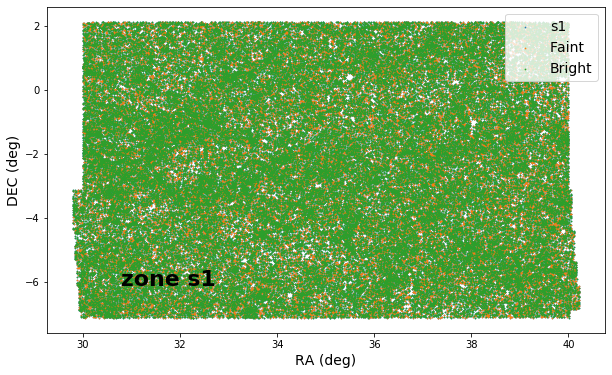

Counts and statistic for zone s1
---------------------------------------------------------------------------
Data lenght = 137885
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 29.791383237542618 , 40.22310373031725 )
Declination Range Zone : ( -7.124788537066563 , 2.1249584230045375 )
---------------------------------------------------------------------------
Covered area = 96.29429458327706
Covered Faint area = 96.29064007229601
Covered Bright area = 96.27538415408254
---------------------------------------------------------------------------
N(BGS_FAINT_SOUTH)=  51406
N(BGS_FAINT_NORTH)=  0
N(BGS_FAINT_HIP_SOUTH)=  5709
N(BGS_FAINT_HIP_NORTH)=  0
N(BGS_BRIGHT_SOUTH)=  80770
N(BGS_BRIGHT_NORTH)=  0
---------------------------------------------------------------------------
N(BGS_FAINT)=  57115
N(BGS_BRIGHT)=  80770
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  593.0
DENSITY(

(96.29429458327706, 57115, 80770, 593.0, 839.0)

In [11]:
make_scatter(s1,"s",1)
prepare_count(s1,"s",1)

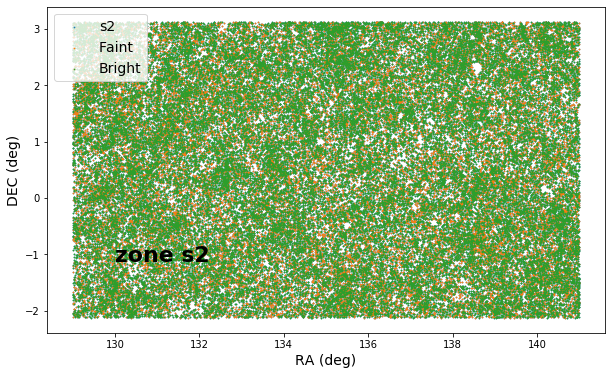

Counts and statistic for zone s2
---------------------------------------------------------------------------
Data lenght = 89560
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 129.00006337038744 , 140.99961403352427 )
Declination Range Zone : ( -2.1249870585327377 , 3.1249720333715563 )
---------------------------------------------------------------------------
Covered area = 62.97271638229157
Covered Faint area = 62.964297371609064
Covered Bright area = 62.97271638229157
---------------------------------------------------------------------------
N(BGS_FAINT_SOUTH)=  34344
N(BGS_FAINT_NORTH)=  0
N(BGS_FAINT_HIP_SOUTH)=  3812
N(BGS_FAINT_HIP_NORTH)=  0
N(BGS_BRIGHT_SOUTH)=  51404
N(BGS_BRIGHT_NORTH)=  0
---------------------------------------------------------------------------
N(BGS_FAINT)=  38156
N(BGS_BRIGHT)=  51404
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  606.0
DENSIT

(62.97271638229157, 38156, 51404, 606.0, 816.0)

In [12]:
make_scatter(s2,"s",2)
prepare_count(s2,"s",2)

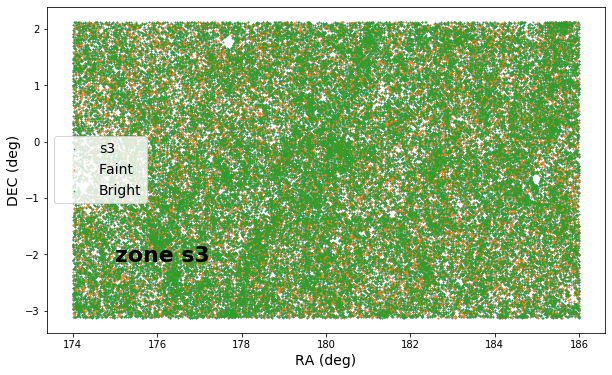

Counts and statistic for zone s3
---------------------------------------------------------------------------
Data lenght = 92850
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 174.00046386203638 , 185.99998849320528 )
Declination Range Zone : ( -3.1249541019120057 , 2.1249394373754193 )
---------------------------------------------------------------------------
Covered area = 62.97179388119822
Covered Faint area = 62.97097666603009
Covered Bright area = 62.96788564008984
---------------------------------------------------------------------------
N(BGS_FAINT_SOUTH)=  34427
N(BGS_FAINT_NORTH)=  0
N(BGS_FAINT_HIP_SOUTH)=  3824
N(BGS_FAINT_HIP_NORTH)=  0
N(BGS_BRIGHT_SOUTH)=  54599
N(BGS_BRIGHT_NORTH)=  0
---------------------------------------------------------------------------
N(BGS_FAINT)=  38251
N(BGS_BRIGHT)=  54599
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  607.0
DENSITY

(62.97179388119822, 38251, 54599, 607.0, 867.0)

In [13]:
make_scatter(s3,"s",3)
prepare_count(s3,"s",3)

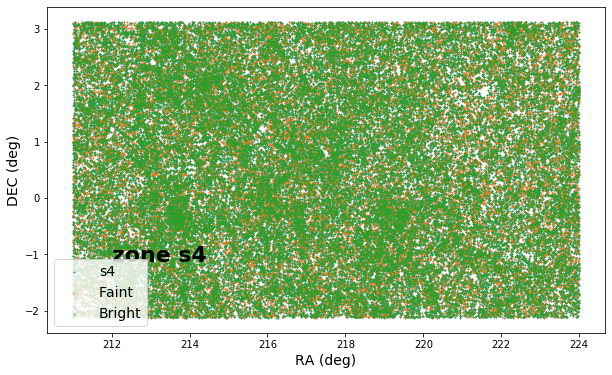

Counts and statistic for zone s4
---------------------------------------------------------------------------
Data lenght = 97099
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 211.00021399968153 , 223.9999157768371 )
Declination Range Zone : ( -2.1248678413670095 , 3.12491699965537 )
---------------------------------------------------------------------------
Covered area = 68.21916920930911
Covered Faint area = 68.21654340833588
Covered Bright area = 68.21753407595057
---------------------------------------------------------------------------
N(BGS_FAINT_SOUTH)=  36113
N(BGS_FAINT_NORTH)=  0
N(BGS_FAINT_HIP_SOUTH)=  4010
N(BGS_FAINT_HIP_NORTH)=  0
N(BGS_BRIGHT_SOUTH)=  56976
N(BGS_BRIGHT_NORTH)=  0
---------------------------------------------------------------------------
N(BGS_FAINT)=  40123
N(BGS_BRIGHT)=  56976
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  588.0
DENSITY(BG

(68.21916920930911, 40123, 56976, 588.0, 835.0)

In [14]:
make_scatter(s4,"s",4)
prepare_count(s4,"s",4)

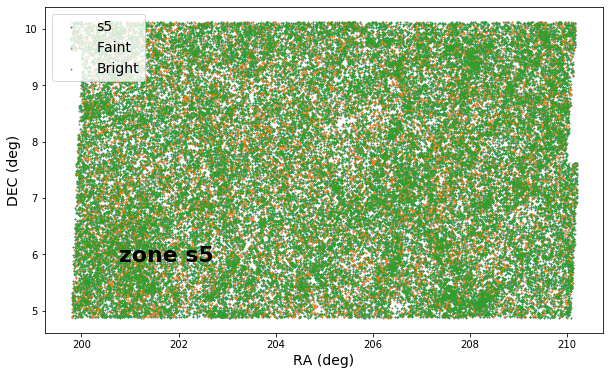

Counts and statistic for zone s5
---------------------------------------------------------------------------
Data lenght = 73839
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 199.77528306469438 , 210.20964478990723 )
Declination Range Zone : ( 4.8750638805314725 , 10.124986427677754 )
---------------------------------------------------------------------------
Covered area = 54.29194349034644
Covered Faint area = 54.24222903309765
Covered Bright area = 54.29194349034644
---------------------------------------------------------------------------
N(BGS_FAINT_SOUTH)=  26875
N(BGS_FAINT_NORTH)=  0
N(BGS_FAINT_HIP_SOUTH)=  2981
N(BGS_FAINT_HIP_NORTH)=  0
N(BGS_BRIGHT_SOUTH)=  43983
N(BGS_BRIGHT_NORTH)=  0
---------------------------------------------------------------------------
N(BGS_FAINT)=  29856
N(BGS_BRIGHT)=  43983
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  550.0
DENSITY(

(54.29194349034644, 29856, 43983, 550.0, 810.0)

In [15]:
make_scatter(s5,"s",5)
prepare_count(s5,"s",5)

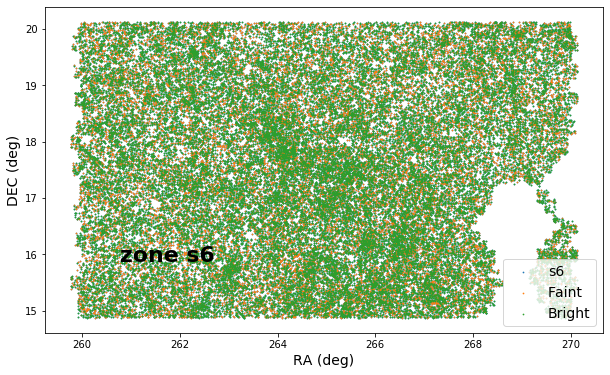

Counts and statistic for zone s6
---------------------------------------------------------------------------
Data lenght = 62221
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 259.7669534712801 , 270.1324482191871 )
Declination Range Zone : ( 14.875022483929952 , 20.124898261995735 )
---------------------------------------------------------------------------
Covered area = 51.88080726147074
Covered Faint area = 51.87901655720325
Covered Bright area = 51.83995087115889
---------------------------------------------------------------------------
N(BGS_FAINT_SOUTH)=  22906
N(BGS_FAINT_NORTH)=  0
N(BGS_FAINT_HIP_SOUTH)=  2543
N(BGS_FAINT_HIP_NORTH)=  0
N(BGS_BRIGHT_SOUTH)=  36772
N(BGS_BRIGHT_NORTH)=  0
---------------------------------------------------------------------------
N(BGS_FAINT)=  25449
N(BGS_BRIGHT)=  36772
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  491.0
DENSITY(BG

(51.88080726147074, 25449, 36772, 491.0, 709.0)

In [16]:
make_scatter(s6,"s",6)
prepare_count(s6,"s",6)

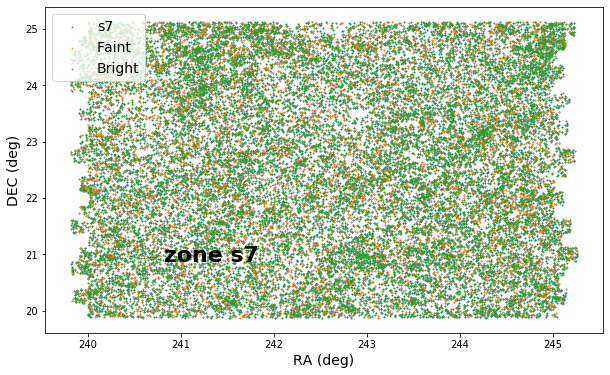

Counts and statistic for zone s7
---------------------------------------------------------------------------
Data lenght = 34753
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 239.81854255125518 , 245.25983319981646 )
Declination Range Zone : ( 19.87519286881525 , 25.124926603226815 )
---------------------------------------------------------------------------
Covered area = 26.38167909428509
Covered Faint area = 26.354934144616028
Covered Bright area = 26.38161934047083
---------------------------------------------------------------------------
N(BGS_FAINT_SOUTH)=  12697
N(BGS_FAINT_NORTH)=  0
N(BGS_FAINT_HIP_SOUTH)=  1408
N(BGS_FAINT_HIP_NORTH)=  0
N(BGS_BRIGHT_SOUTH)=  20648
N(BGS_BRIGHT_NORTH)=  0
---------------------------------------------------------------------------
N(BGS_FAINT)=  14105
N(BGS_BRIGHT)=  20648
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  535.0
DENSITY(

(26.38167909428509, 14105, 20648, 535.0, 783.0)

In [17]:
make_scatter(s7,"s",7)
prepare_count(s7,"s",7)

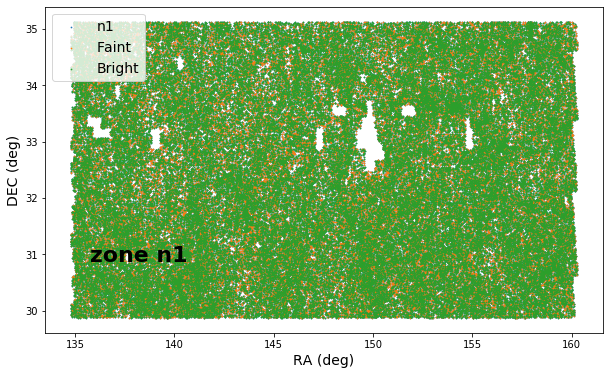

Counts and statistic for zone n1
---------------------------------------------------------------------------
Data lenght = 150431
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 134.77474392540796 , 160.26370644175742 )
Declination Range Zone : ( 29.875027524913452 , 35.12485526843576 )
---------------------------------------------------------------------------
Covered area = 112.8170541679089
Covered Faint area = 112.8170541679089
Covered Bright area = 112.80750456100718
---------------------------------------------------------------------------
N(BGS_FAINT_SOUTH)=  30060
N(BGS_FAINT_NORTH)=  27024
N(BGS_FAINT_HIP_SOUTH)=  3353
N(BGS_FAINT_HIP_NORTH)=  3017
N(BGS_BRIGHT_SOUTH)=  45763
N(BGS_BRIGHT_NORTH)=  41214
---------------------------------------------------------------------------
N(BGS_FAINT)=  63454
N(BGS_BRIGHT)=  86977
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  56

(112.8170541679089, 63454, 86977, 562.0, 771.0)

In [18]:
make_scatter(n1,"n",1)
prepare_count(n1,"n",1)

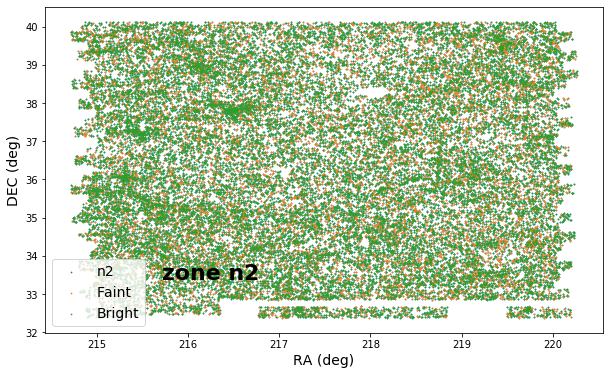

Counts and statistic for zone n2
---------------------------------------------------------------------------
Data lenght = 42781
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 214.7114387980715 , 220.2656180360054 )
Declination Range Zone : ( 32.380236743975445 , 40.124945622917224 )
---------------------------------------------------------------------------
Covered area = 34.662066373164
Covered Faint area = 34.55950029671542
Covered Bright area = 34.65941163482998
---------------------------------------------------------------------------
N(BGS_FAINT_SOUTH)=  0
N(BGS_FAINT_NORTH)=  15946
N(BGS_FAINT_HIP_SOUTH)=  0
N(BGS_FAINT_HIP_NORTH)=  1774
N(BGS_BRIGHT_SOUTH)=  0
N(BGS_BRIGHT_NORTH)=  25061
---------------------------------------------------------------------------
N(BGS_FAINT)=  17720
N(BGS_BRIGHT)=  25061
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  513.0
DENSITY(BGS_

(34.662066373164, 17720, 25061, 513.0, 723.0)

In [19]:
make_scatter(n2,"n",2)
prepare_count(n2,"n",2)

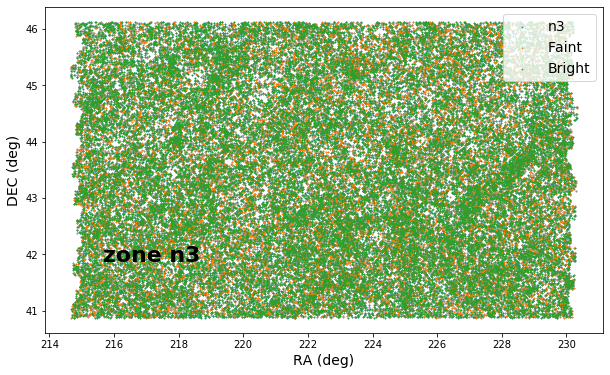

Counts and statistic for zone n3
---------------------------------------------------------------------------
Data lenght = 78971
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 214.6584196533241 , 230.3289535085701 )
Declination Range Zone : ( 40.87509750499105 , 46.12488992610157 )
---------------------------------------------------------------------------
Covered area = 59.65354346204266
Covered Faint area = 59.64729241599668
Covered Bright area = 59.64269838587122
---------------------------------------------------------------------------
N(BGS_FAINT_SOUTH)=  0
N(BGS_FAINT_NORTH)=  29808
N(BGS_FAINT_HIP_SOUTH)=  0
N(BGS_FAINT_HIP_NORTH)=  3316
N(BGS_BRIGHT_SOUTH)=  0
N(BGS_BRIGHT_NORTH)=  45847
---------------------------------------------------------------------------
N(BGS_FAINT)=  33124
N(BGS_BRIGHT)=  45847
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  555.0
DENSITY(BGS_

(59.65354346204266, 33124, 45847, 555.0, 769.0)

In [20]:
make_scatter(n3,"n",3)
prepare_count(n3,"n",3)

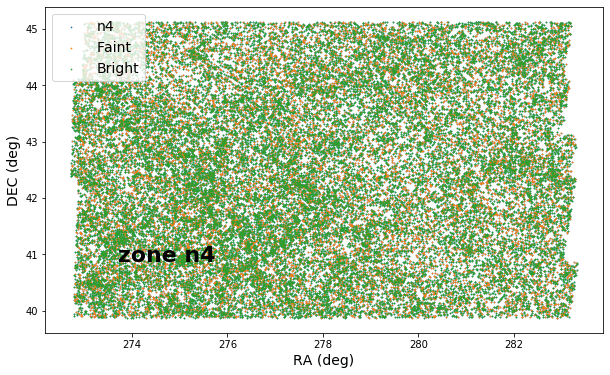

Counts and statistic for zone n4
---------------------------------------------------------------------------
Data lenght = 48281
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 272.7107513899603 , 283.32680410926866 )
Declination Range Zone : ( 39.87514168442464 , 45.12469035940829 )
---------------------------------------------------------------------------
Covered area = 41.0737717722645
Covered Faint area = 40.998340411656265
Covered Bright area = 41.03784538296871
---------------------------------------------------------------------------
N(BGS_FAINT_SOUTH)=  0
N(BGS_FAINT_NORTH)=  18093
N(BGS_FAINT_HIP_SOUTH)=  0
N(BGS_FAINT_HIP_NORTH)=  2007
N(BGS_BRIGHT_SOUTH)=  0
N(BGS_BRIGHT_NORTH)=  28181
---------------------------------------------------------------------------
N(BGS_FAINT)=  20100
N(BGS_BRIGHT)=  28181
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  490.0
DENSITY(BGS

(41.0737717722645, 20100, 28181, 490.0, 687.0)

In [21]:
make_scatter(n4,"n",4)
prepare_count(n4,"n",4)

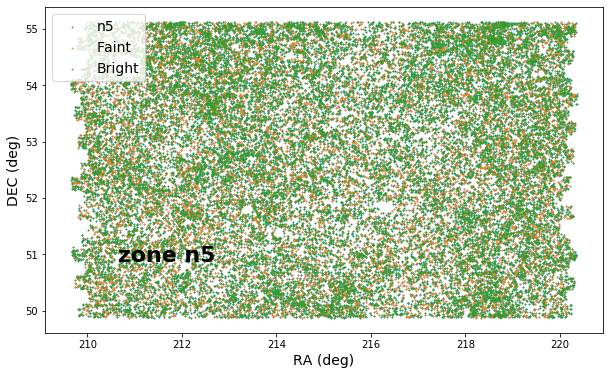

Counts and statistic for zone n5
---------------------------------------------------------------------------
Data lenght = 42011
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 209.6480141267944 , 220.36610437228217 )
Declination Range Zone : ( 49.875189610680344 , 55.12483849487222 )
---------------------------------------------------------------------------
Covered area = 34.24070786195642
Covered Faint area = 34.13508834772743
Covered Bright area = 34.23998272919563
---------------------------------------------------------------------------
N(BGS_FAINT_SOUTH)=  0
N(BGS_FAINT_NORTH)=  16084
N(BGS_FAINT_HIP_SOUTH)=  0
N(BGS_FAINT_HIP_NORTH)=  1783
N(BGS_BRIGHT_SOUTH)=  0
N(BGS_BRIGHT_NORTH)=  24144
---------------------------------------------------------------------------
N(BGS_FAINT)=  17867
N(BGS_BRIGHT)=  24144
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  523.0
DENSITY(BG

(34.24070786195642, 17867, 24144, 523.0, 705.0)

In [22]:
make_scatter(n5,"n",5)
prepare_count(n5,"n",5)

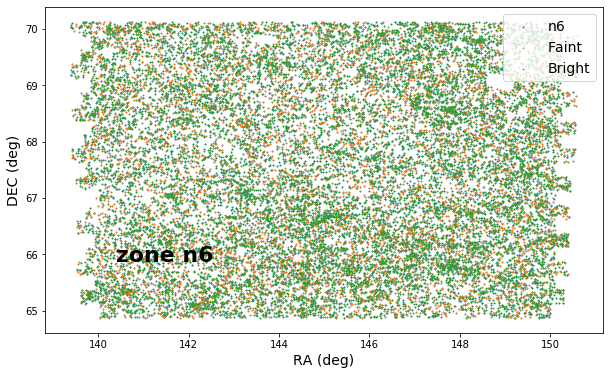

Counts and statistic for zone n6
---------------------------------------------------------------------------
Data lenght = 25447
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 139.39253178809903 , 150.59398215476583 )
Declination Range Zone : ( 64.87530571696492 , 70.12493616131164 )
---------------------------------------------------------------------------
Covered area = 22.49513054099953
Covered Faint area = 22.46615067875248
Covered Bright area = 22.418329098117333
---------------------------------------------------------------------------
N(BGS_FAINT_SOUTH)=  0
N(BGS_FAINT_NORTH)=  9705
N(BGS_FAINT_HIP_SOUTH)=  0
N(BGS_FAINT_HIP_NORTH)=  1076
N(BGS_BRIGHT_SOUTH)=  0
N(BGS_BRIGHT_NORTH)=  14666
---------------------------------------------------------------------------
N(BGS_FAINT)=  10781
N(BGS_BRIGHT)=  14666
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  480.0
DENSITY(BG

(22.49513054099953, 10781, 14666, 480.0, 654.0)

In [23]:
make_scatter(n6,"n",6)
prepare_count(n6,"n",6)